<a href="https://colab.research.google.com/github/larissavaladao/time_series_curuai/blob/main/6.%20parameters_by_period/1.set_periods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dados obidos = cotas
obidos = pd.read_csv('/content/drive/MyDrive/CURUAI_PROCESS/17050001_Cotas.csv').drop_duplicates(subset=['Data'])
obidos = obidos[['EstacaoCodigo', 'Data',  'Maxima', 'Minima', 'Media' ]].copy()
obidos['Data'] = pd.to_datetime(obidos['Data'])
obidos

,EstacaoCodigo,Data,Maxima,Minima,Media
0,17050001,2024-01-10,-64.0,-128.0,-102.0
3,17050001,2024-01-04,628.0,510.0,570.0
6,17050001,2024-01-03,510.0,414.0,467.0
9,17050001,2024-01-02,412.0,320.0,370.0
12,17050001,2024-01-01,318.0,160.0,251.0
...,...,...,...,...,...
1940,17050001,1968-01-06,648.0,583.0,617.0
1942,17050001,1968-01-05,646.0,575.0,621.0
1944,17050001,1968-01-04,570.0,478.0,521.0
1946,17050001,1968-01-03,478.0,401.0,436.0


In [3]:
# dados curuai = cotas
curuai = pd.read_csv('/content/drive/MyDrive/CURUAI_PROCESS/17060000_Cotas.csv').drop_duplicates(subset=['Data'])
curuai = curuai[['EstacaoCodigo', 'Data',  'Maxima', 'Minima', 'Media' ]].copy()
curuai['Data'] = pd.to_datetime(curuai['Data'])
curuai

,EstacaoCodigo,Data,Maxima,Minima,Media
0,17060000,2019-01-03,NaN,NaN,NaN
4,17060000,2019-01-02,904.0,805.0,848.0
8,17060000,2019-01-01,805.0,683.0,747.0
12,17060000,2018-01-12,682.0,465.0,569.0
16,17060000,2018-01-11,461.0,418.0,431.0
...,...,...,...,...,...
1383,17060000,1983-01-01,693.0,597.0,649.0
1387,17060000,1982-01-12,590.0,489.0,540.0
1391,17060000,1982-01-11,NaN,NaN,NaN
1395,17060000,1982-01-10,NaN,NaN,NaN


In [4]:
# concatenar dados das duas estações e restringir para o periodo de tempo que há dados em curuai
cotas = pd.concat([obidos, curuai]).sort_values(by='Data').set_index('Data')
cotas = cotas.loc[curuai['Data'].min():curuai['Data'].max()]

In [5]:
# reajustar indices para gerar gráfico
cotas = cotas.reset_index()
cotas

,Data,EstacaoCodigo,Maxima,Minima,Media
0,1982-01-09,17050001,514.0,315.0,425.0
1,1982-01-09,17060000,789.0,609.0,711.0
2,1982-01-10,17060000,NaN,NaN,NaN
3,1982-01-10,17050001,308.0,142.0,217.0
4,1982-01-11,17050001,176.0,143.0,155.0
...,...,...,...,...,...
857,2019-01-01,17060000,805.0,683.0,747.0
858,2019-01-02,17050001,634.0,530.0,577.0
859,2019-01-02,17060000,904.0,805.0,848.0
860,2019-01-03,17060000,NaN,NaN,NaN


<Axes: xlabel='Data', ylabel='Media'>

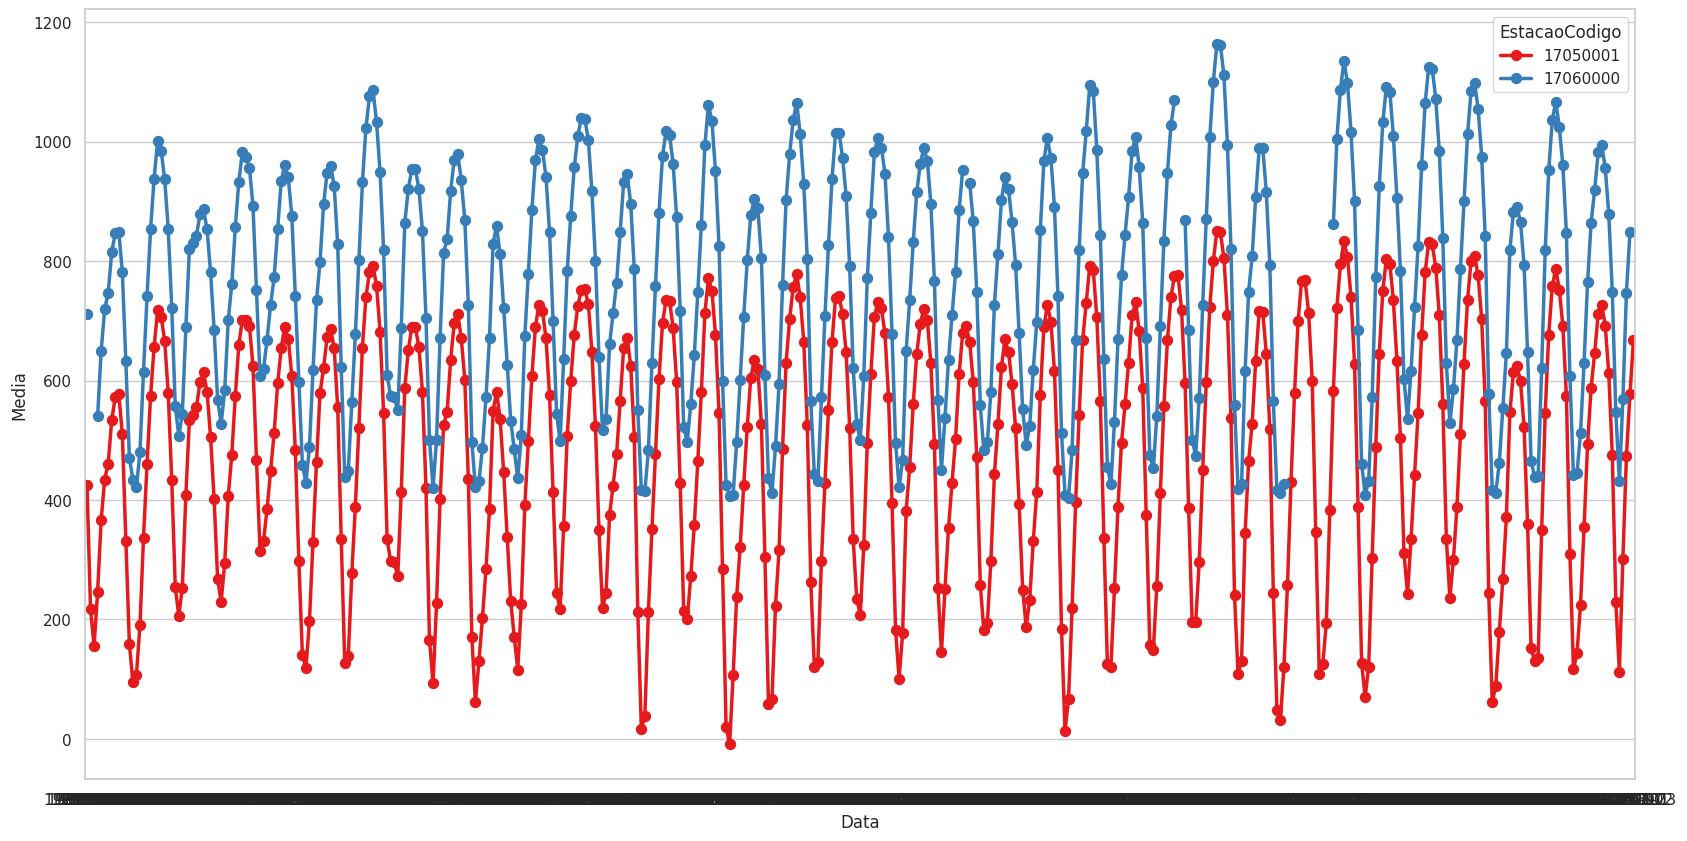

In [6]:
#comparar dados = seguem o mesmo padrão, aproximadamente
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.pointplot(data=cotas,x = cotas['Data'],y = cotas['Media'], hue = cotas['EstacaoCodigo'], palette="Set1", linewidth=2.5)

<Axes: xlabel='Data', ylabel='Media'>

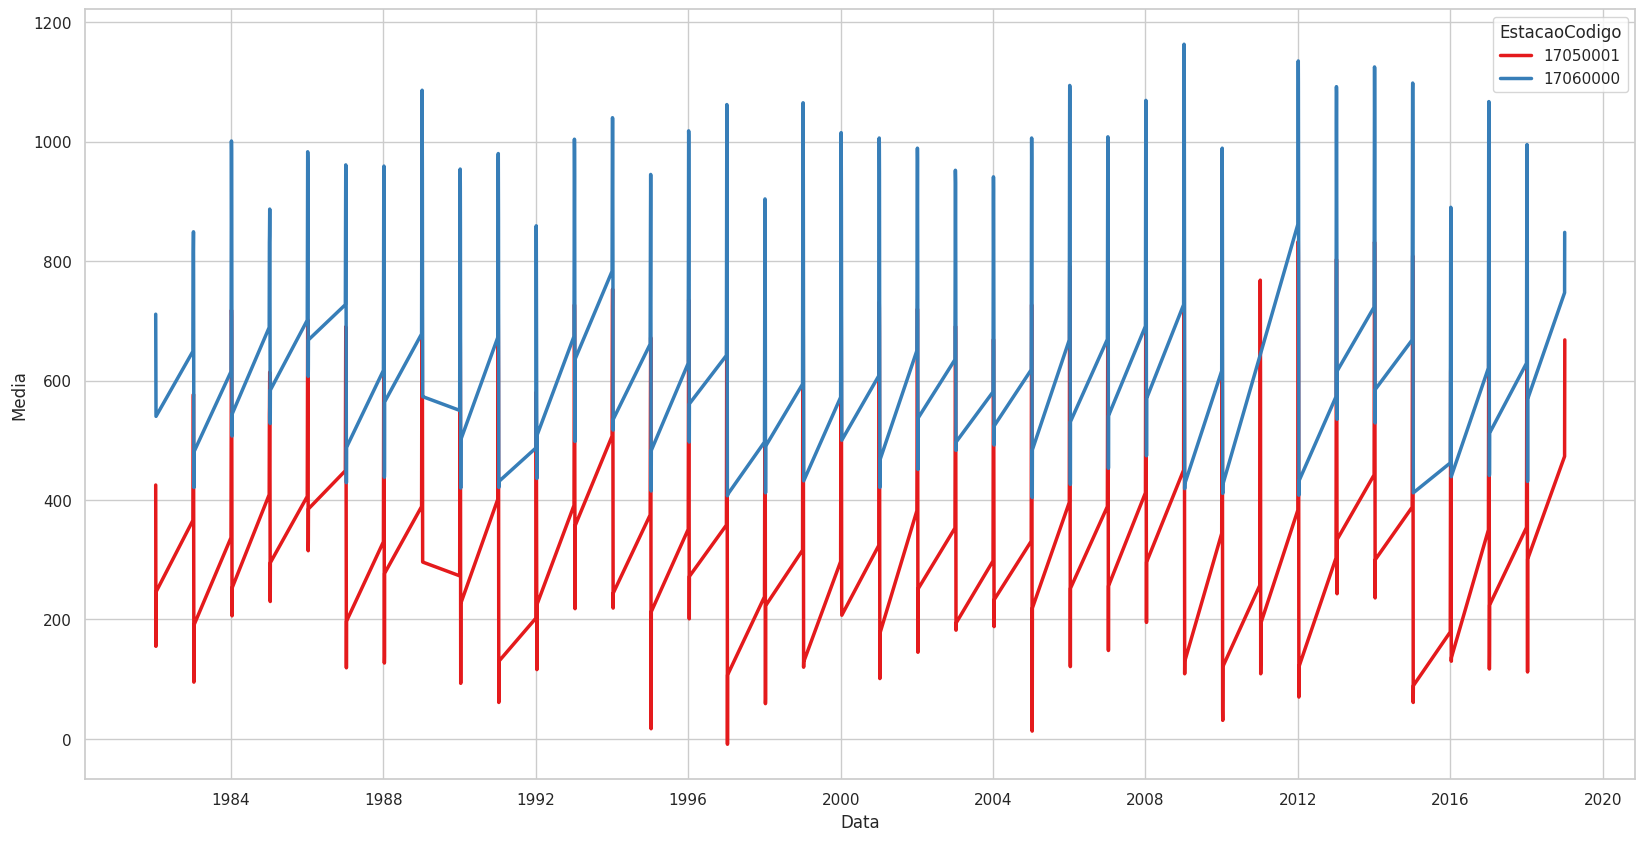

In [7]:
#comparar dados = seguem o mesmo padrão, aproximadamente
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.lineplot(data=cotas,x = cotas['Data'],y = cotas['Media'], hue = cotas['EstacaoCodigo'], palette="Set1", linewidth=2.5)

In [ ]:
def set_period(row):
  if row['Media'] > 450:
    return 'HW'
  elif row['Media'] < 350:
    return 'LW'
  elif row['Media'] >= 350 and row['Media'] <= 450 and row.['Data'].dt.month

In [8]:
# obter dados de óbidos apenas para o periodo entre 2000 e 2024
obidos = obidos.loc[(obidos['Data'].dt.year >= 2000) & (obidos['Data'].dt.year <= 2024)].copy()
obidos['water_period'] = obidos.apply(lambda row: if obidos.loc[(obidos['Media'])]
obidos.describe()

,EstacaoCodigo,Data,Maxima,Minima,Media
count,293.0,293,293.000000,293.000000,293.000000
mean,17050001.0,2011-09-24 02:42:11.058020352,547.061433,439.286689,493.948805
min,17050001.0,2000-01-01 00:00:00,-64.000000,-128.000000,-102.000000
25%,17050001.0,2006-01-02 00:00:00,394.000000,213.000000,300.000000
50%,17050001.0,2012-01-03 00:00:00,600.000000,475.000000,546.000000
75%,17050001.0,2018-01-04 00:00:00,729.000000,659.000000,699.000000
max,17050001.0,2024-01-10 00:00:00,860.000000,839.000000,850.000000
std,0.0,NaN,217.462978,245.781156,233.019461


<Axes: xlabel='Data', ylabel='Media'>

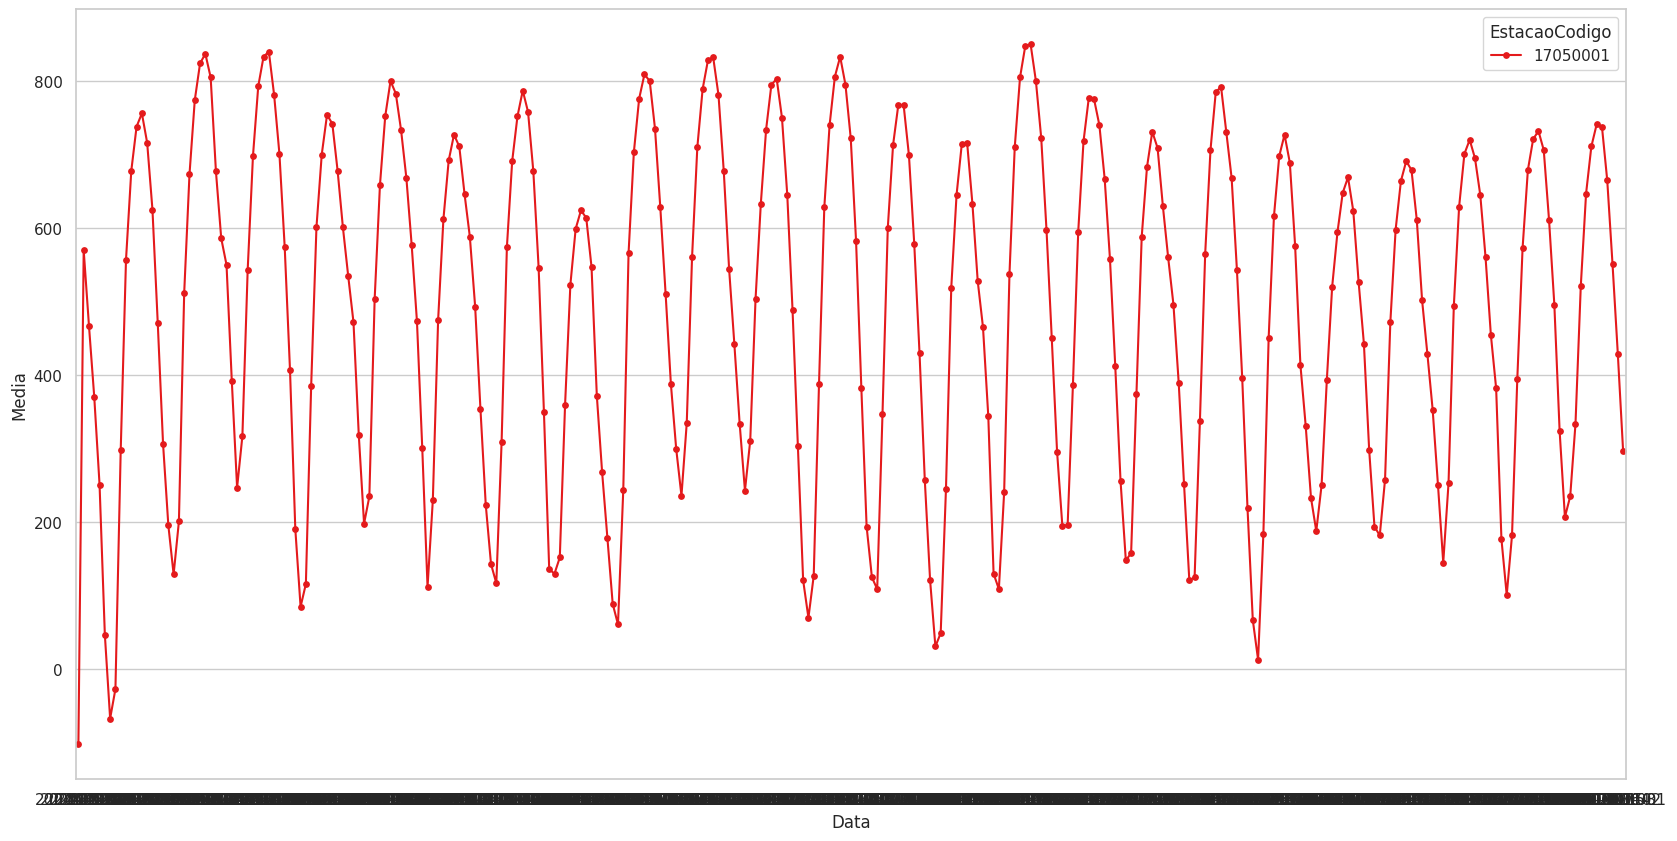

In [9]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.pointplot(data=obidos,x = obidos['Data'],y = obidos['Media'], hue = obidos['EstacaoCodigo'], palette="Set1", linewidth=1.5)

<Axes: xlabel='Data', ylabel='Media'>

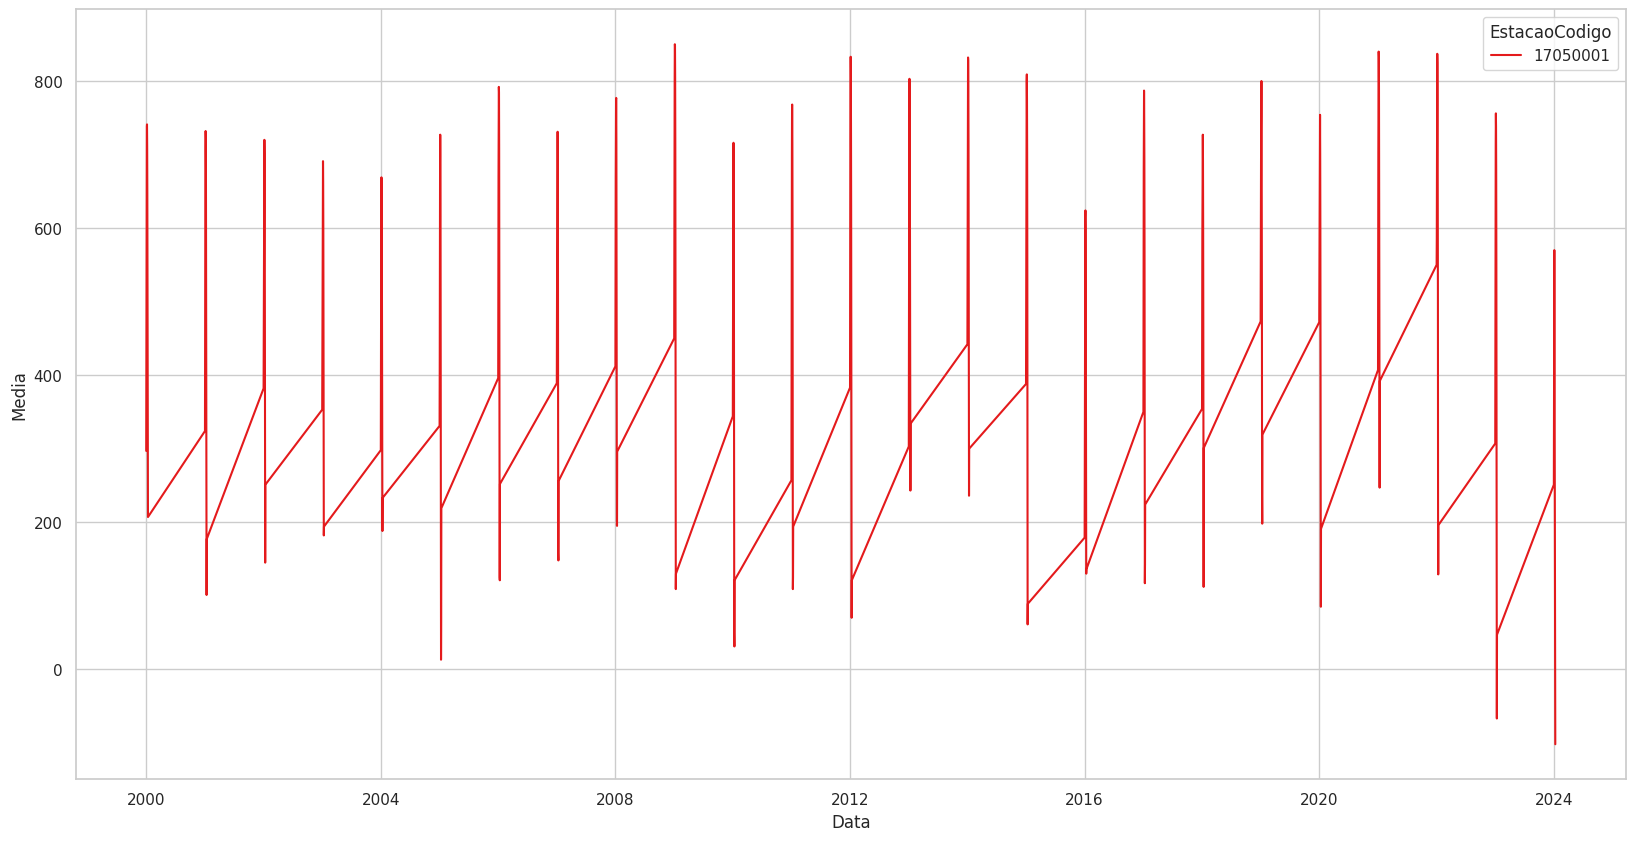

In [ ]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.lineplot(data=obidos,x = obidos['Data'],y = obidos['Media'], hue = obidos['EstacaoCodigo'], palette="Set1", linewidth=1.5)

In [ ]:
obidos = obidos.set_index('Data')

In [ ]:
rolling_mean = obidos.rolling(3).mean()
rolling_std = obidos.rolling(3).std()

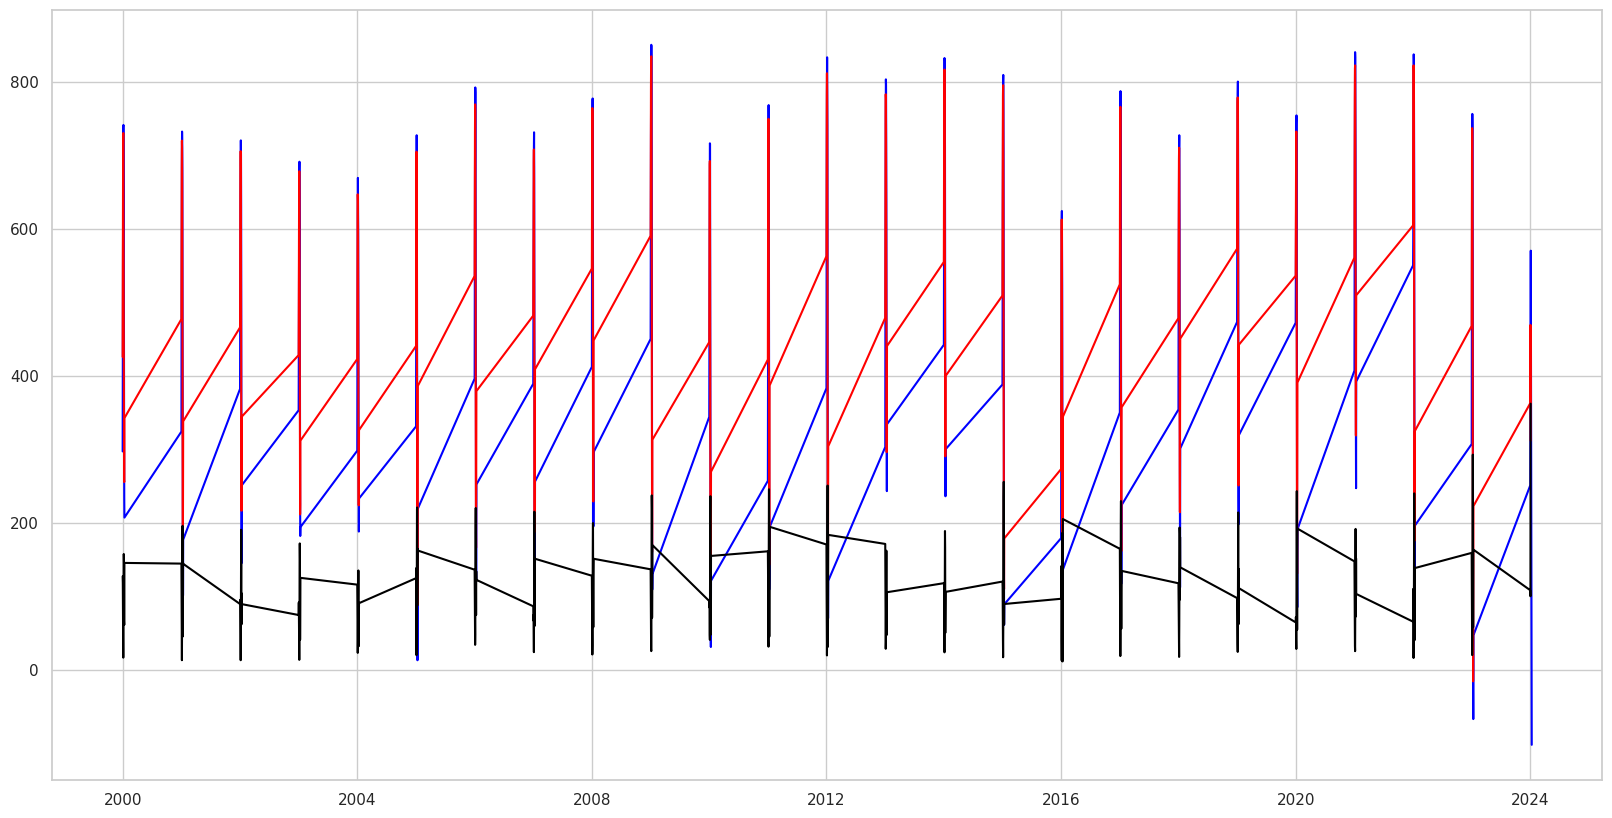

In [ ]:
plt.plot(obidos['Media'], color="blue",label="Original")
plt.plot(rolling_mean['Media'], color="red", label="Rolling Mean ")
plt.plot(rolling_std['Media'], color="black", label = "Rolling Standard Deviation")

In [ ]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(obidos['Media'],autolag="AIC")

In [ ]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

In [ ]:
print(output_df) # dados são estacionários

       Values                       Metric
0   -4.301019              Test Statistics
1    0.000442                      p-value
2   16.000000             No. of lags used
3  276.000000  Number of observations used
4   -3.454267          critical value (1%)
5   -2.872070          critical value (5%)
6   -2.572381         critical value (10%)


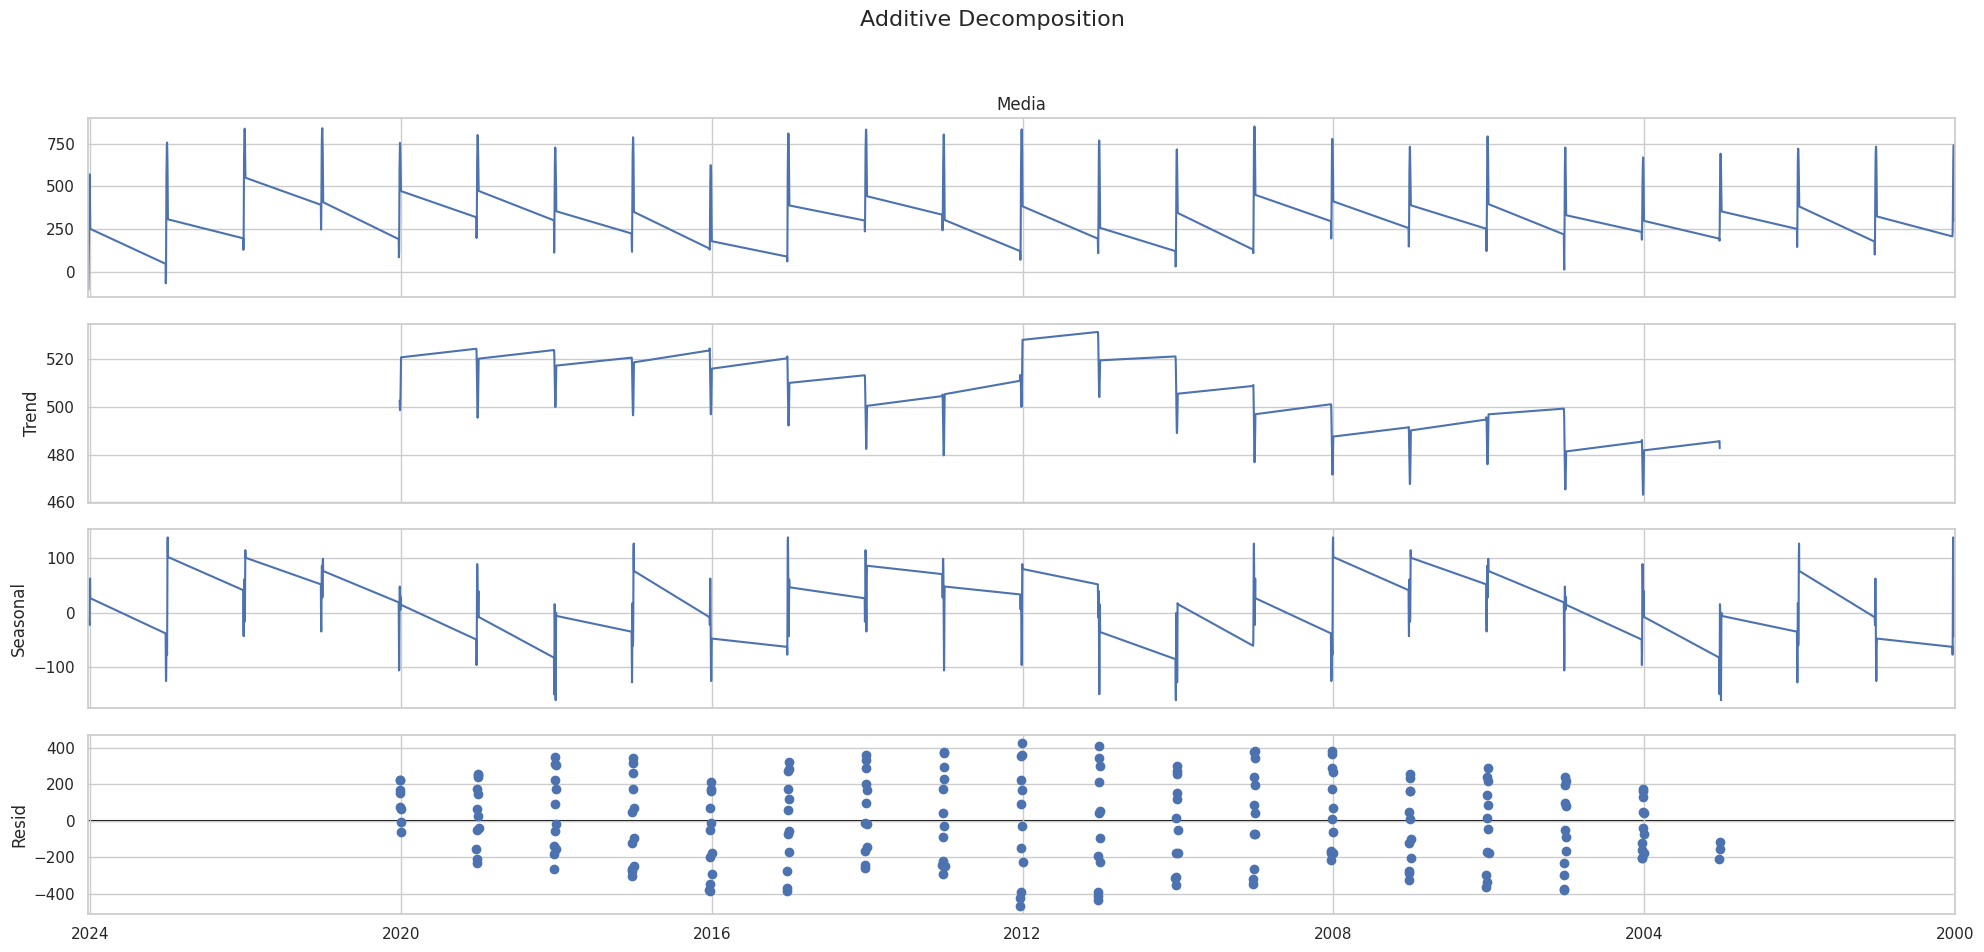

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Additive Decomposition
additive_decomposition = seasonal_decompose(obidos['Media'], model='additive', period=90)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

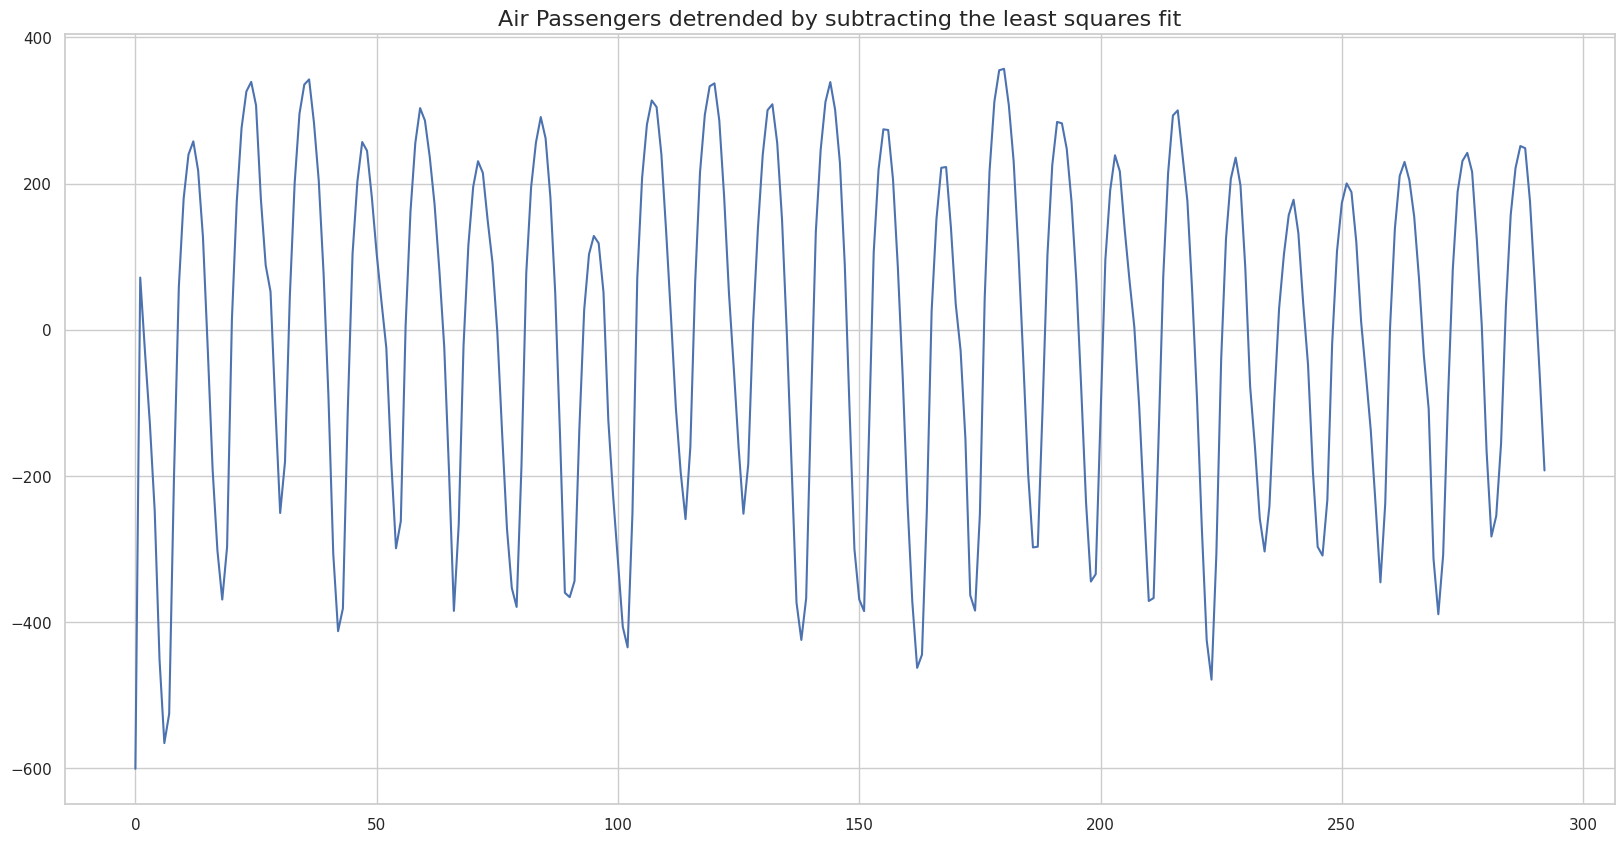

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(obidos['Media'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)